In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Nowa sekcja

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
validation_data, test_data, validation_labels, test_labels = train_test_split(x_test, y_test,test_size=0.6, random_state=42 )

In [ ]:
history = network.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=(validation_data, validation_labels))

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.4693 - accuracy: 0.8194 - val_loss: 0.3907 - val_accuracy: 0.8429
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2806 - accuracy: 0.9022 - val_loss: 0.3143 - val_accuracy: 0.8753
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2198 - accuracy: 0.9213 - val_loss: 0.3040 - val_accuracy: 0.8762
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1870 - accuracy: 0.9329 - val_loss: 0.2942 - val_accuracy: 0.8834
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1617 - accuracy: 0.9445 - val_loss: 0.3048 - val_accuracy: 0.8831
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1451 - accuracy: 0.9490 - val_loss: 0.3275 - val_accuracy: 0.8759
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1297 - accuracy: 0.9568 - val_loss: 0.3346 - val_accuracy: 0.8762
Epoch 8/20
49

In [ ]:
test_loss, test_acc = network.evaluate(validation_data, validation_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6525 - accuracy: 0.8532


In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'loss')

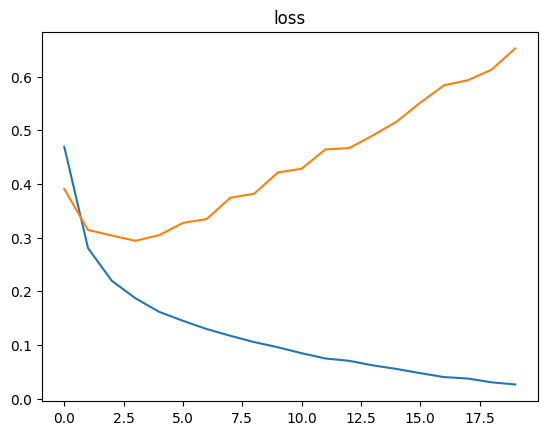

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('loss')


Text(0.5, 1.0, 'accuracy')

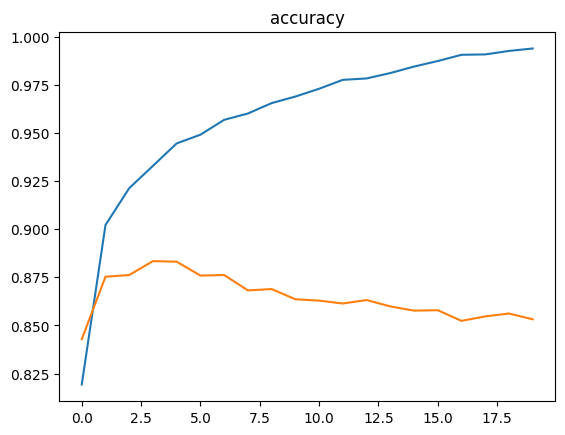

In [ ]:
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('accuracy')

In [ ]:
test_loss, test_acc = network.evaluate(test_data, test_labels)

print('test_acc:', test_acc)
print('test loss: ', test_loss)

469/469 [==============================] - 2s 3ms/step - loss: 0.6112 - accuracy: 0.8563
test_acc: 0.856333315372467
test loss:  0.6112185716629028


In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

network.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

NameError: name 'network' is not defined

In [ ]:
!pip install scikeras

In [ ]:
print(len(y_train))

25000


In [ ]:
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers

def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu'), input_shape=(10000,))
    network.add(layers.Dense(16, activation='relu'))
    network.add(layers.Dense(1, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return network

model = KerasClassifier(build_fn=create_model)
# model = create_model()
par1_batch = [32, 64]
par2_epoch = [3, 5]#

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 926, in _fit
    self._check_model_compatibility(y)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 549, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
TypeError: object of type 'NoneType' has no len()
